<a href="https://colab.research.google.com/github/tleitch/HFstrategies21/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remote data access using pandas

The pandas library enables access to data displayed on websites using the `read_html()` function and access to the API endpoints of various data providers through the related `pandas-datareader` library.

## Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install mplfinance
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

     |████████████████████████████████| 71kB 5.0MB/s 


## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [3]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [4]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 505 non-null    object
 1   Security               505 non-null    object
 2   SEC filings            505 non-null    object
 3   GICS Sector            505 non-null    object
 4   GICS Sub-Industry      505 non-null    object
 5   Headquarters Location  505 non-null    object
 6   Date first added       453 non-null    object
 7   CIK                    505 non-null    int64 
 8   Founded                505 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.6+ KB


In [5]:
sp500_constituents.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


## pandas-datareader for Market Data

`pandas` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available

See [documentation](https://pandas-datareader.readthedocs.io/en/latest/); functionality frequently changes as underlying provider APIs evolve.

### Yahoo Finance

In [6]:
start = '2014'
end = datetime(2017, 5, 24)

yahoo= web.DataReader('FB', 'yahoo', start=start, end=end)
yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855 entries, 2014-01-02 to 2017-05-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       855 non-null    float64
 1   Low        855 non-null    float64
 2   Open       855 non-null    float64
 3   Close      855 non-null    float64
 4   Volume     855 non-null    int64  
 5   Adj Close  855 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 46.8 KB


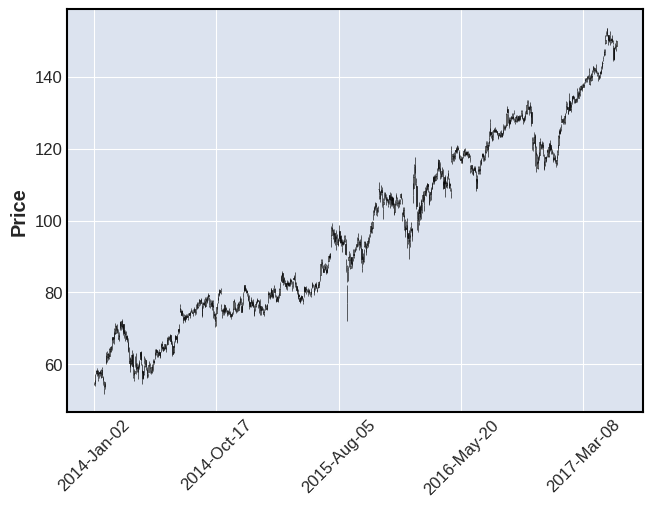

<Figure size 640x480 with 0 Axes>

In [11]:
mpf.plot(yahoo, type='candle')

plt.tight_layout()

# Assignment 1 starts here
Pick another security from the S&P 500 and plot it only this time use up to today's date. Use example above as baseline to start with.

**mplfinance** is package that specializes in plotting financial time series. Information on it can be found here: https://github.com/matplotlib/mplfinance


In [ ]:
## Data load code here


In [ ]:
## Plot code here

Now pick another symbol and plot it but this time using the information on the github repo add a 20 and 50 day moving average


In [ ]:
## Load data here

In [ ]:
## Plot time series with moving averages

Now load multiple tickers and try to plot them on same graph

In [ ]:
# Load tickers here

In [ ]:
# Multi plot here


# Assignment 1 continued
Unfortunately mplfinance requires a specific structure for the data to be useful, so if you move away from open/high/low/close  dataframes you need to use a more basic package. matplotlib is the common but seaborn is better and more capable, so we'll use it here.

Also, by using the datetime package we can easily slice our data in time using just simple text strings fir dates

### FRED

In [60]:
# We will use datetime tso we can time slice the dataframes
import datetime


start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

#df = web.DataReader(['LNS13023653', 'LNS13026638'],
 #                   'fred', start, end)

inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2005-05-01 to 2021-04-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  192 non-null    float64
 1   CPILFESL  192 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


In [65]:
print(inflation['CPIAUCSL'])

DATE
2005-05-01    193.600
2005-06-01    193.700
2005-07-01    194.900
2005-08-01    196.100
2005-09-01    198.800
               ...   
2020-12-01    261.560
2021-01-01    262.231
2021-02-01    263.161
2021-03-01    264.793
2021-04-01    266.832
Name: CPIAUCSL, Length: 192, dtype: float64


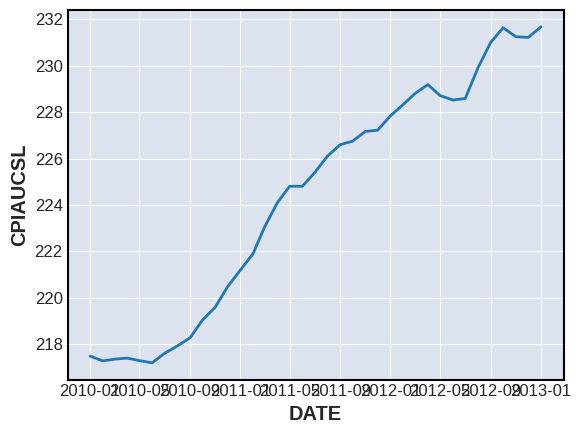

In [42]:
import seaborn as sns
# simple time series plot
sns.lineplot(data = inflation["CPIAUCSL"])

Now we'll time slice our data by creating a slice bewteen the begining of 2016 and up to the last day of 2021 (which hasn't happened, so it will default to last date in the time series

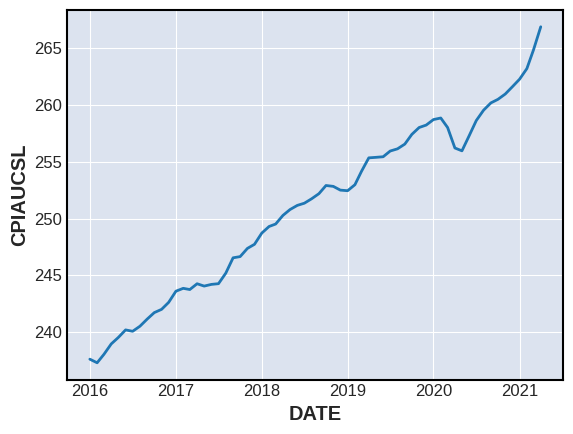

In [59]:
drange = inflation.loc["2016": "2021"]
sns.lineplot(data = drange["CPIAUCSL"])

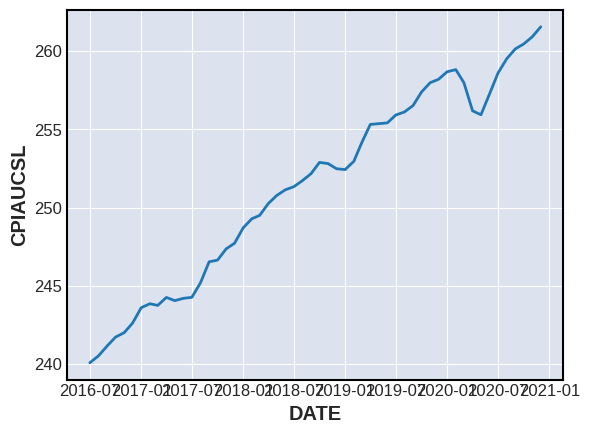

In [63]:
# can use specific dates for range
drange = inflation.loc["2016-06-15": "2020-12-31"]
sns.lineplot(data = drange["CPIAUCSL"])

Now pick another ticker from FRED, say an interest rate or economic factor and plot it using seaborn using the time frame of 2006 to 2012

In [ ]:
# Data load goes here


In [ ]:
# Plot code goes here
